In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#Reading data
Titanic_data=pd.read_csv("C:/Users/ASUS/Desktop/Titanic survival/tested.csv")

In [3]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
Titanic_data.shape

(418, 12)

In [5]:
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
#Drop cabin column
Titanic_data.drop(columns=['Cabin'],inplace=True)

In [8]:
Titanic_data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [9]:
#fillup fare column
Titanic_data['Fare'].value_counts()

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64

In [29]:
Titanic_data['Fare'].fillna('7,7500',inplace=True)

In [30]:
Titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
#fill age with average values
Titanic_data['Age'].fillna('30',inplace=True)

In [13]:
Titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
#Finding no of people survived and not survived
Titanic_data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

Visualization

Text(0.5, 1.0, 'Survival According to Sex')

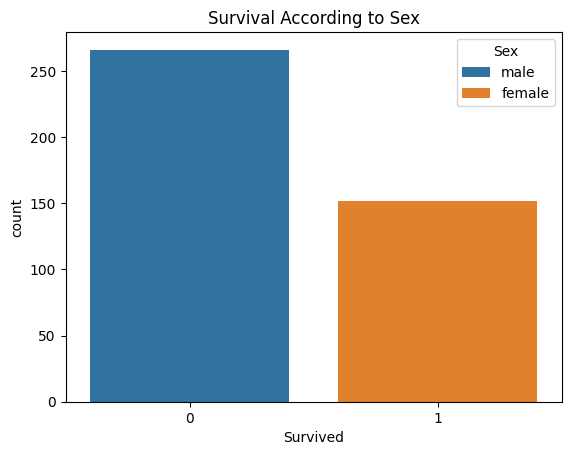

In [15]:
#no of servivors survived
sns.countplot(x=Titanic_data['Survived'], hue=Titanic_data['Sex'])
plt.title('Survival According to Sex')


Text(0.5, 1.0, 'Survival According to Pclass')

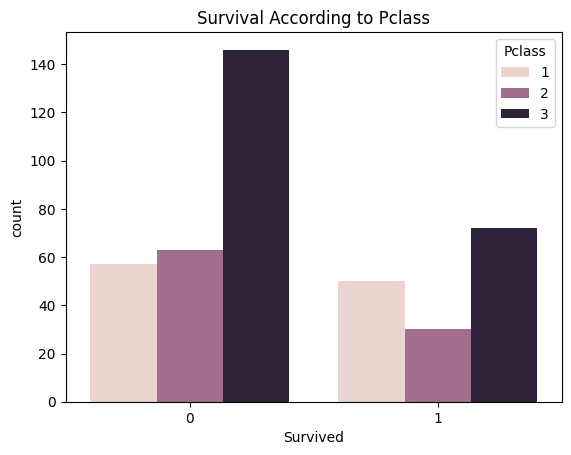

In [16]:
sns.countplot(x=Titanic_data['Survived'], hue=Titanic_data['Pclass'])
plt.title('Survival According to Pclass')

Text(0.5, 1.0, 'Survival According to SibSp')

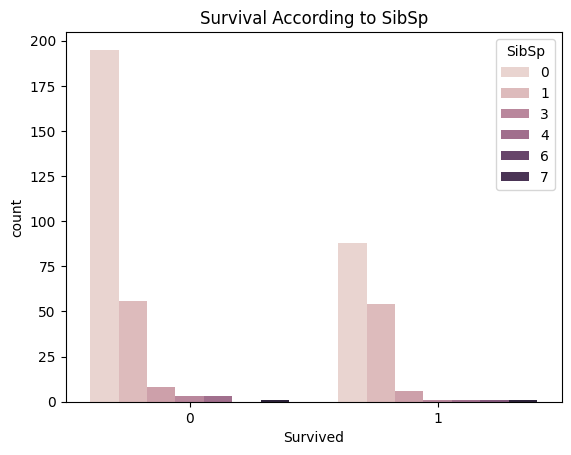

In [17]:
sns.countplot(x=Titanic_data['Survived'], hue=Titanic_data['SibSp'])
plt.title('Survival According to SibSp')

Text(0.5, 1.0, 'Survival According to Embarked')

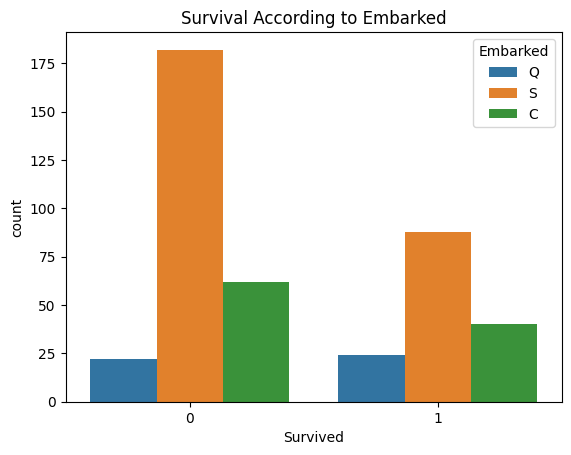

In [18]:
sns.countplot(x=Titanic_data['Survived'], hue=Titanic_data['Embarked'])
plt.title('Survival According to Embarked')

In [19]:
#Changing categorial into numeric
Titanic_data['Sex'].value_counts() 

Sex
male      266
female    152
Name: count, dtype: int64

In [20]:
Titanic_data['Embarked'].value_counts() 

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [21]:
#Converting Categorical data
Titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) 

In [22]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [23]:
#Separate feature and target
x=Titanic_data[['Pclass','Sex']]
y=Titanic_data['Survived']

In [24]:
print(x)
print(y)

     Pclass  Sex
0         3    0
1         3    1
2         2    0
3         3    0
4         3    1
..      ...  ...
413       3    0
414       1    1
415       3    0
416       3    0
417       3    0

[418 rows x 2 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [25]:
#Splitting data into train data and test data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

MODEL TRAINING

In [26]:
model=LogisticRegression(random_state=0)
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

MODEL PREDICTION

In [27]:
xpred=print(model.predict(x_test))

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0]


In [28]:
import warnings
warnings.filterwarnings('ignore')
result=model.predict([[2,1]])
if(result==0):
    print("Person is not survived")
else:
    print("Person is survived")

Person is survived
